## Dates and Calendars
#### Which day of the week?
Hurricane Andrew, which hit Florida on August 24, 1992, was one of the costliest and deadliest hurricanes in US history. Which day of the week did it make landfall?

Let's walk through all of the steps to figure this out.

In [1]:
# Import date from datetime
from datetime import date

# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

0


Great! What day does the week begin for you? It depends where you are from! In the United States, Canada, and Japan, Sunday is often considered the first day of the week. Everywhere else, it usually begins on Monday.

#### How many hurricanes come early?
In this chapter, you will work with a list of the hurricanes that made landfall in Florida from 1950 to 2017. There were 235 in total. Check out the variable florida_hurricane_dates, which has all of these dates.

Atlantic hurricane season officially begins on June 1. How many hurricanes since 1950 have made landfall in Florida before the official start of hurricane season?

In [2]:
import pickle as pkl
import pandas as pd
with open("florida_hurricane_dates.pkl", "rb") as f:
    object = pkl.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'florida_hurricane_dates.csv')

florida_hurricane_dates = pd.read_csv("florida_hurricane_dates.csv")

florida_hurricane_dates["0"] = florida_hurricane_dates["0"].astype("datetime64[ns]")
florida_hurricane_dates["0"] = pd.to_datetime(florida_hurricane_dates["0"], infer_datetime_format = True, errors = 'coerce')

/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_18043/738829291.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  florida_hurricane_dates["0"] = pd.to_datetime(florida_hurricane_dates["0"], infer_datetime_format = True, errors = 'coerce')


In [3]:
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.dt.strftime('%m') < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

AttributeError: 'str' object has no attribute 'dt'

#### Subtracting dates
Python date objects let us treat calendar dates as something similar to numbers: we can compare them, sort them, add, and even subtract them. This lets us do math with dates in a way that would be a pain to do by hand.

The 2007 Florida hurricane season was one of the busiest on record, with 8 hurricanes in one year. The first one hit on May 9th, 2007, and the last one hit on December 13th, 2007. How many days elapsed between the first and last hurricane in 2007?

In [4]:
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

218


Good job! One thing to note: be careful using this technique for historical dates hundreds of years in the past. Our calendar systems have changed over time, and not every date from then would be the same day and month today.

In [5]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] +=1
  
print(hurricanes_each_month)

AttributeError: 'str' object has no attribute 'month'

Success! This illustrated a generally useful pattern for working with complex data: creating a dictionary, performing some operation on each element, and storing the results back in the dictionary.


#### Putting a list of dates in order
Much like numbers and strings, date objects in Python can be put in order. Earlier dates come before later ones, and so we can sort a list of date objects from earliest to latest.

What if our Florida hurricane dates had been scrambled? We've gone ahead and shuffled them so they're in random order and saved the results as dates_scrambled. Your job is to put them back in chronological order, and then print the first and last dates from this sorted list.

In [6]:
# Print the first and last scrambled dates
print(dates_scrambled[0])
print(dates_scrambled[-1])

NameError: name 'dates_scrambled' is not defined

In [7]:
# Put the dates in order
dates_ordered = sorted(dates_scrambled)

# Print the first and last ordered dates
print(dates_ordered[0])
print(dates_ordered[-1])

NameError: name 'dates_scrambled' is not defined

Excellent! You can use sorted() on several data types in Python, including sorting lists of numbers, lists of strings, or even lists of lists, which by default are compared on the first element.

#### Printing dates in a friendly format
Because people may want to see dates in many different formats, Python comes with very flexible functions for turning date objects into strings.

Let's see what event was recorded first in the Florida hurricane data set. In this exercise, you will format the earliest date in the florida_hurricane_dates list in two ways so you can decide which one you want to use: either the ISO standard or the typical US style.

In [8]:
# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

AttributeError: 'str' object has no attribute 'isoformat'

Correct! When in doubt, use the ISO format for dates. ISO dates are unambiguous. And if you sort them 'alphabetically', for example, in filenames, they will be in the correct order.

In [9]:
# Import date
from datetime import date

# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime('%Y-%m'))

1992-08


In [10]:
# Import date
from datetime import date

# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime('%B (%Y)'))

August (1992)


In [11]:
# Import date
from datetime import date

# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-DDD'
print(andrew.strftime('%Y-%j'))

1992-239


Nice! Pick the format that best matches your needs. For example, astronomers usually use the 'day number' out of 366 instead of the month and date, to avoid ambiguities between languages.

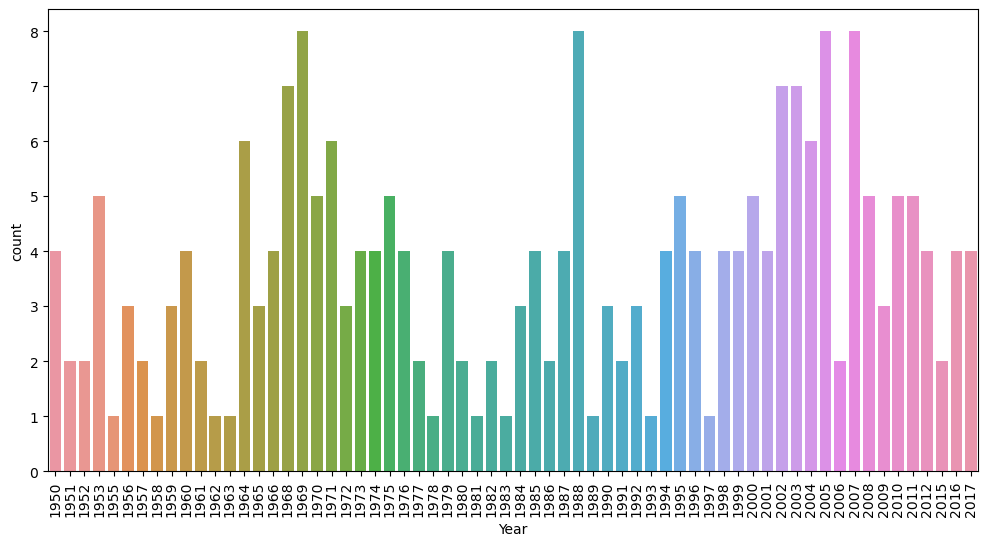

In [29]:
##### KENDİ ÇALIŞMAM ######

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hurricanes = pd.read_csv("florida_hurricane_dates.csv")
hurricanes["0"]= pd.to_datetime(hurricanes["0"])
hurricanes["Year"] = hurricanes["0"].dt.year
hurricanes["Month"] = hurricanes["0"].dt.month
hurricanes["Day"] = hurricanes["0"].dt.day
hurricanes = hurricanes.sort_values("0", ascending = True)
count_year = hurricanes["Year"].value_counts().sort_values()

plt.figure(figsize=(12, 6))

sns.countplot(x = "Year", data = hurricanes)
plt.xticks(rotation = 90)
plt.show()